In [20]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

import seaborn as sns;
from datetime  import date, timedelta;

In [21]:
# объем генерируемой выборки
N = 125639

In [22]:
rand = np.random.default_rng()

# изначально не отрицательное нормальное распределение с достаточно большой дисперсией
data = pd.DataFrame({'default_days':   np.fix(np.abs(rand.normal(0,40,N)))  })

# 40% получат просрочку 0
data.default_days[rand.uniform(0,1,N) < 0.4] = 0;
# 20% получат прострочку 1
data.default_days[rand.uniform(0,1,N) < 0.2] = 1;
# 10% получают просрочку 2
data.default_days[rand.uniform(0,1,N) < 0.1] = 2;
# 10% получают просрочку 3
data.default_days[rand.uniform(0,1,N) < 0.1] = 3;



создаем колонку с дефолтами

In [23]:
data.loc[data.default_days <= 30 ,'defalts_types'] = 0 
data.loc[(data.default_days > 30) & (data.default_days <= 60),'defalts_types'] = 1
data.loc[data.default_days > 60 ,'defalts_types'] = 2

создаем колонку пол

In [24]:
sample = rand.uniform(0,1, N)

data.loc[:, 'sex'] = "Female"

data.loc[(data['defalts_types'] == 0) & (sample > 0.60), 'sex'] = 'Male'
data.loc[(data['defalts_types'] == 1) & (sample > 0.50), 'sex'] = 'Male'
data.loc[(data['defalts_types'] == 2) & (sample > 0.45), 'sex'] = 'Male'


test = pd.crosstab(data.defalts_types, data.sex)
test['Female%']  = test.loc[:,'Female']/test.sum(axis = 1)
test['Male%'] = test.loc[:, 'Male'] / test.sum(axis = 1)
test


sex,Female,Male,Female%,Male%
defalts_types,,,,
0.0,62634,41627,0.600742,0.399255
1.0,7424,7730,0.489904,0.510080
2.0,2810,3414,0.451478,0.548482


создаем колонку возраст

18.0

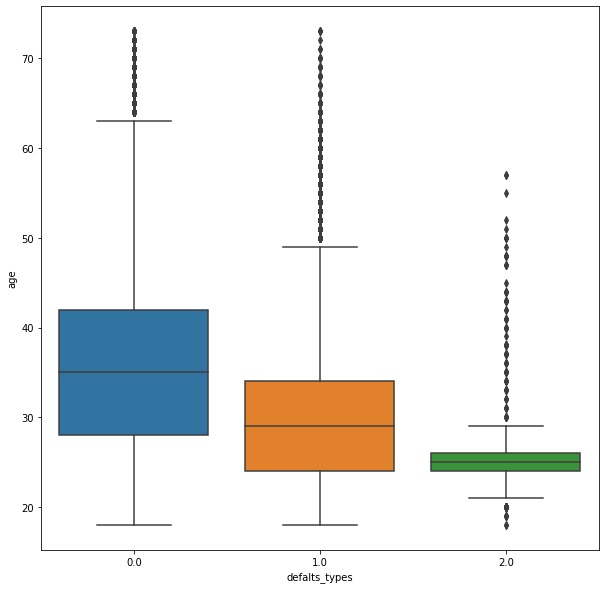

In [25]:
data.loc[(data['defalts_types'] == 0) , 'age'] = np.fix(rand.normal(34, 10, sum((data['defalts_types'] == 0)) ))
data.loc[(data['defalts_types'] == 1) , 'age'] = np.fix(rand.normal(28, 7, sum((data['defalts_types'] == 1)) ))
data.loc[(data['defalts_types'] == 2), 'age'] = np.fix(rand.normal(25, 1.5, sum((data['defalts_types'] == 2)) ))

# сделаем парочку человек из дефолтных групп постарше
#data.loc[(data['defalts_types'] == 1) , 'age'].sample(10) = np.fix(rand.normal(50, 5, 10 ))
data.iloc[data.loc[(data['defalts_types'] == 1) , 'age'].sample(400).index,3] = np.fix(rand.normal(45, 10, 400 ))
data.iloc[data.loc[(data['defalts_types'] == 2) , 'age'].sample(130).index,3] = np.fix(rand.normal(35, 10, 130 ))

# подкрутим немного нижний хвост группы дефолтности 0
data.iloc[data.loc[(data['defalts_types'] == 0) & (data['age'] < 40) , 'age'].sample(1000).index,3] = np.fix(rand.normal(50, 1, 1000 ))


while sum(data['age'] < 18) != 0:
        data.loc[(data['age'] < 18), 'age'] = np.fix(rand.normal(50, 10, sum(data['age'] < 18)  ))


data.loc[data['age'] > 73, 'age'] = np.fix(rand.uniform(18,70, sum(data['age'] > 73))) 

plt.figure(figsize = [10,10])
sns.boxplot(x = 'defalts_types', y = 'age', data= data)

data.age.min()

создаем колонку месячного уровня дохода

<AxesSubplot:xlabel='defalts_types', ylabel='income_level_BYR'>

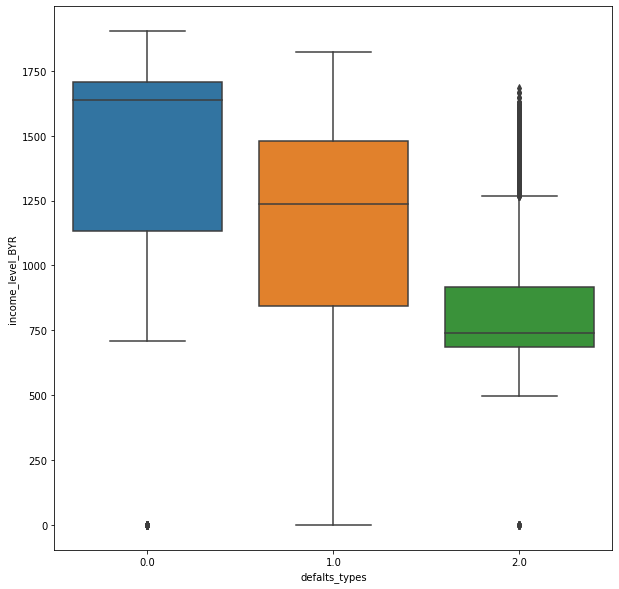

In [26]:
data.loc[(data['defalts_types'] == 0) & (data['age'] > 60) , 'income_level_BYR'] = np.fix(rand.normal(800, 5, sum((data['defalts_types'] == 0) & (data['age'] > 60)) ))
data.loc[(data['defalts_types'] == 0) & (data['age'] <= 60) & (data['age'] > 30) , 'income_level_BYR'] = np.fix(rand.normal(1700, 50, sum((data['defalts_types'] == 0) & (data['age'] <= 60) & (data['age'] > 30)) ))
data.loc[(data['defalts_types'] == 0) & (data['age'] > 25)  & (data['age'] <= 30) , 'income_level_BYR'] = np.fix(rand.normal(1100, 50, sum((data['defalts_types'] == 0) & (data['age'] > 25)  & (data['age'] <= 30)) ))
data.loc[(data['defalts_types'] == 0) & (data['age'] >= 18) & (data['age'] <= 25)  , 'income_level_BYR'] = np.fix(rand.normal(900, 50, sum((data['defalts_types'] == 0) & (data['age'] >= 18) & (data['age'] <= 25)) ))

data.loc[(data['defalts_types'] == 1) & (data['age'] > 60) , 'income_level_BYR'] = np.fix(rand.normal(700, 5, sum((data['defalts_types'] == 1) & (data['age'] > 60)) ))
data.loc[(data['defalts_types'] == 1) & (data['age'] <= 60) & (data['age'] > 30) , 'income_level_BYR'] = np.fix(rand.normal(1500, 50, sum((data['defalts_types'] == 1) & (data['age'] <= 60) & (data['age'] > 30)) ))
data.loc[(data['defalts_types'] == 1) & (data['age'] > 25)  & (data['age'] <= 30) , 'income_level_BYR'] = np.fix(rand.normal(900, 50, sum((data['defalts_types'] == 1) & (data['age'] > 25)  & (data['age'] <= 30)) ))
data.loc[(data['defalts_types'] == 1) & (data['age'] >= 18) & (data['age'] <= 25) , 'income_level_BYR'] = np.fix(rand.normal(800, 50, sum((data['defalts_types'] == 1) & (data['age'] >= 18) & (data['age'] <= 25)) ))


data.loc[(data['defalts_types'] == 2) & (data['age'] > 60) , 'income_level_BYR'] = np.fix(rand.normal(600, 5, sum((data['defalts_types'] == 2) & (data['age'] > 60)) ))
data.loc[(data['defalts_types'] == 2) & (data['age'] <= 60) & (data['age'] > 30) , 'income_level_BYR'] = np.fix(rand.normal(1400, 50, sum((data['defalts_types'] == 2) & (data['age'] <= 60) & (data['age'] > 30)) ))
data.loc[(data['defalts_types'] == 2) & (data['age'] > 25)  & (data['age'] <= 30) , 'income_level_BYR'] = np.fix(rand.normal(900, 50, sum((data['defalts_types'] == 2) & (data['age'] > 25)  & (data['age'] <= 30)) ))
data.loc[(data['defalts_types'] == 2) & (data['age'] >= 18) & (data['age'] <= 25)  , 'income_level_BYR'] = np.fix(rand.normal(700, 50, sum((data['defalts_types'] == 2) & (data['age'] >= 18) & (data['age'] <= 25)) ))


data.iloc[data.sample(20000).index,4] = np.fix(rand.normal(data['income_level_BYR'].mean(), 100, 20000))
data.iloc[data.sample(500).index,4] = 0

plt.figure(figsize = [10,10])
sns.boxplot(x = 'defalts_types', y = 'income_level_BYR', data= data)


создаем колонку ежемесячного платежа (потом удалю ее)

<AxesSubplot:xlabel='defalts_types', ylabel='monthly_payment_BYR'>

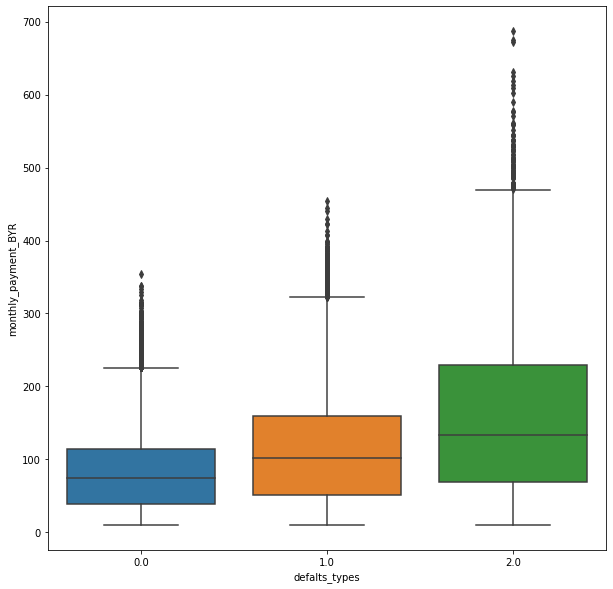

In [27]:
means = [69, 102, 150];
stds = [65, 100, 150]

for i in range(3):
    data.loc[(data['defalts_types'] == i), 'monthly_payment_BYR'] = np.fix(np.abs(rand.normal(means[i], stds[i],   sum((data['defalts_types'] == i))  )))


# добавим шума
data.iloc[data.sample(20000).index,5] = np.abs(np.fix(rand.normal(data['monthly_payment_BYR'].mean(), 50, 20000)))

# исправим чрезвычано малые суммы
data.loc[data['monthly_payment_BYR'] < 10, 'monthly_payment_BYR'] = np.fix(rand.uniform(10, 45,sum(data['monthly_payment_BYR'] < 10)) )



plt.figure(figsize = [10,10])
sns.boxplot(x = 'defalts_types', y = 'monthly_payment_BYR', data= data)

Колонка с датой регистрации договора

In [28]:
min_date = np.datetime64('2016-01-01')

data.loc[:,'registration_date'] = min_date + np.array(np.fix(rand.uniform(0, 365, N)), dtype='timedelta64[D]')



# большие кредиты наврятли дадут через интернет банкинг потому выкинем записи об воскресеньях о больших кредитах
data['week_days'] = data['registration_date'].apply(lambda x: x.weekday())
data.loc[(data['week_days'] == 6) , 'registration_date'] -= np.array(np.fix(rand.uniform(1, 6, sum(data['week_days'] == 6) )), dtype='timedelta64[D]')
data.drop('week_days', axis = 1, inplace=True)



In [29]:
# смортим кредиты что должны были быть погашены за 2 года
monthes_to_pay = np.array(np.fix(rand.uniform(2,24,N)), dtype='timedelta64[M]')
data.loc[:,'repayment_date'] = data['registration_date'] + monthes_to_pay

In [30]:
data.head()

,default_days,defalts_types,sex,age,income_level_BYR,monthly_payment_BYR,registration_date,repayment_date
0,0.0,0.0,Female,21.0,912.0,27.0,2016-08-27,2018-03-27
1,1.0,0.0,Female,27.0,1045.0,28.0,2016-07-08,2017-02-05
2,0.0,0.0,Female,55.0,1509.0,22.0,2016-08-12,2017-01-10
3,11.0,0.0,Female,40.0,1592.0,157.0,2016-09-05,2017-01-03
4,39.0,1.0,Male,24.0,816.0,77.0,2016-09-26,2018-05-27


сумма договора как срок кредита в месяцаз умноженный на срок кредита

20.0

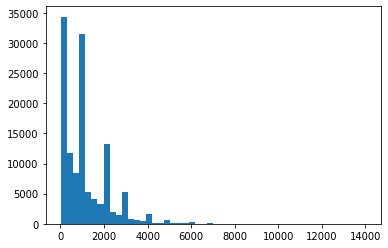

In [31]:
data.loc[:, 'contract_summ'] = (data.monthly_payment_BYR * monthes_to_pay.astype(int));


# удалим показатель ежемесячного платежа предполагается что в дальнейшем мы его хитрым аналилитическим решением получим
data.drop('monthly_payment_BYR', axis = 1, inplace = True)


# отразим то что график должен быть пилоообразный - люди предпочитают круглые суммы кредитов


for i in range(-1,-4, -1):
    my_sample = data.sample(40**(-i)).index
    data.iloc[my_sample,-1] = np.round(data.iloc[my_sample, -1], i)


# устраним записи с менее чем 10 рублями
data.loc[data['contract_summ'] < 10,'contract_summ'] = np.round(rand.uniform(10, 50), -1)

plt.hist(data['contract_summ'], bins = 50)
data['contract_summ'].min()



количесво обращений в кредитное бюро за последные 30 дней

<AxesSubplot:xlabel='defalts_types', ylabel='СВ_30_days'>

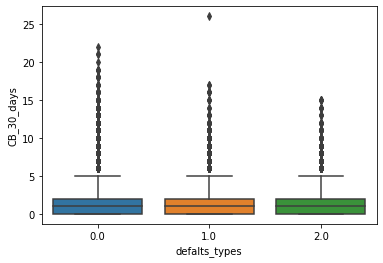

In [32]:
# будет распределено в соотвествии с распределением Пуассона с увеличением средней

means = [2, 2, 2];

for i in range(3):
    data.loc[data.defalts_types == i, 'СВ_30_days'] = np.fix(rand.exponential(means[i], sum(data.defalts_types == i)))

sns.boxplot(x = 'defalts_types',  y ='СВ_30_days', data = data)

Количесво дейсвоющих кредитных договоров

(214, 10)
(214,)


<AxesSubplot:xlabel='defalts_types', ylabel='force_contract'>

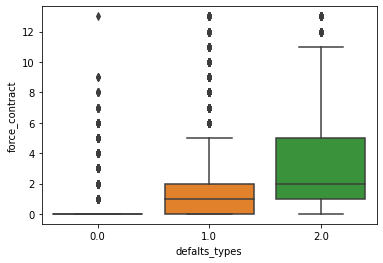

In [33]:
data.loc[:,'force_contract'] = np.fix(rand.exponential((data.default_days + (3 - data.default_days)/200)/20))


# огнаниччим кол-во договоров 13ю
print(data.loc[data['force_contract'] > 13,:].shape) 
generation = np.fix(rand.uniform(5, 12, sum(data['force_contract'] > 13)));
print(generation.shape)

data.loc[data['force_contract'] > 13,'force_contract'] = generation


sns.boxplot(x = 'defalts_types',  y ='force_contract', data = data)

недвижимость

In [34]:
cut_points = (data.age - data.age.min())*0.5/(data.age.max() - data.age.min()) + (data.income_level_BYR - data.income_level_BYR.min())*0.5/(data.income_level_BYR.max() - data.income_level_BYR.min()) + (data.default_days - data.default_days.min())*0.6/(data.default_days.max() - data.default_days.min())

sample = rand.uniform(0,1,N)

data.loc[cut_points < sample, 'real_estate'] = 'Yes'
data.loc[cut_points >= sample, 'real_estate'] = 'No'

test = pd.crosstab(data.defalts_types, data.real_estate)
test['Yes%']  = test.loc[:,'Yes']/test.sum(axis = 1)
test['No%'] = test.loc[:, 'No'] / test.sum(axis = 1)
test


real_estate,No,Yes,Yes%,No%
defalts_types,,,,
0.0,46240,58021,0.556498,0.443500
1.0,6367,8787,0.579847,0.420137
2.0,2674,3550,0.570373,0.429588


Образование

In [35]:
random_sample = rand.uniform(0,1, N)
grop_names = ['высшее', 'незаконченное высшее', 'неполное среднее', 'среднее', 'среднее специальное']
probs = [   [0, 0 , 0],
            [0.4, 0.27, 0.13],
            [0.45, 0.35, 0.26],
            [0.48, 0.39, 0.32],
            [0.73, 0.69, 0.66],
            [1, 1, 1]]


for i in range(1,6):
    for j in range(3):
        data.loc[(data.defalts_types == j) & (random_sample <= probs[i][j]) & (random_sample >= probs[i-1][j]), 'Education'] =  grop_names[i-1]



test = pd.crosstab(data.Education, data.defalts_types)
test['0%']  = test.iloc[:,0]/test.sum(axis = 1)
test['1%'] = test.iloc[:, 1] / test.sum(axis = 1)
test['2%'] = test.iloc[:, 2] / test.sum(axis = 1)
test

defalts_types,0.0,1.0,2.0,0%,1%,2%
Education,,,,,,
высшее,41739,4124,797,0.894535,0.088382,0.017081
незаконченное высшее,5166,1164,815,0.723023,0.162895,0.114052
неполное среднее,3083,597,360,0.763119,0.147744,0.089089
среднее,26267,4595,2151,0.795656,0.139184,0.065154
среднее специальное,28006,4674,2101,0.805210,0.134381,0.060405


Количество иждивенцев

In [36]:
# количесво иждивенцев - изначально предполагаю его не значимым потому сделаю тупо зависящим от возраста
age_bins = [0, 22 , 25, 35, 40, 50, data['age'].max()]
poiss_param = [0.1,0.2,0.5,0.5,0.3,0.2]

for i in range(len(poiss_param)):
    condition = (data['age']> age_bins[i]) & (data['age'] <= age_bins[i+1])
    data.loc[condition,'dependents_count'] = rand.poisson(poiss_param[i], sum(condition))


In [37]:
#data.loc[data.repayment_date < data.registration_date  , ['repayment_date', 'registration_date']]
data.loc[:,'registration_date']

0        2016-08-27
1        2016-07-08
2        2016-08-12
3        2016-09-05
4        2016-09-26
            ...    
125634   2016-12-20
125635   2016-09-03
125636   2016-07-22
125637   2016-10-25
125638   2016-09-14
Name: registration_date, Length: 125639, dtype: datetime64[ns]

In [38]:


# даты в нужный формат 
data['registration_date'] = data['registration_date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
data['repayment_date'] = data['repayment_date'].apply(lambda x: x.strftime('%Y-%m-%d')) 



data.drop('defalts_types', axis = 1, inplace = True)
data.to_csv('input_data.csv')
data.head()

,default_days,sex,age,income_level_BYR,registration_date,repayment_date,contract_summ,СВ_30_days,force_contract,real_estate,Education,dependents_count
0,0.0,Female,21.0,912.0,2016-08-27,2018-03-27,1000.0,1.0,0.0,No,среднее специальное,0.0
1,1.0,Female,27.0,1045.0,2016-07-08,2017-02-05,196.0,2.0,0.0,No,высшее,1.0
2,0.0,Female,55.0,1509.0,2016-08-12,2017-01-10,30.0,8.0,0.0,Yes,среднее,0.0
3,11.0,Female,40.0,1592.0,2016-09-05,2017-01-03,628.0,1.0,0.0,Yes,среднее,0.0
4,39.0,Male,24.0,816.0,2016-09-26,2018-05-27,2000.0,0.0,2.0,No,среднее специальное,1.0
